# 1. Import and Install Dependencies

In [121]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib
# Using Tensorflow to build a deep neural network that leverages LSTM layers to handle the sequence of keypoints
# Using opencv to access webcam, record the feed coming from our webcam and draw keypoint landmarks
# Using Mediapipe Holistic to extract keypoints (pose, left-hand, and right-hand)
# Using scikit-learn for evaluation metrics and leverage training and testing split
# Using matplotlib to help us visualise images better


In [175]:
import cv2 # Import opencv
import numpy as np # Import numpy to help with array and structure our dataset
import os # Import os to work with file paths
from matplotlib import pyplot as plt # Import matplotlib to visualise images better
import time # Import time to take a sleep between each frame that we collect
import mediapipe as mp # Import Mediapipe to extract keypoints

# 2. Keypoints using MP Holistic

In [176]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [177]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [178]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections

In [179]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

In [180]:
cap = cv2.VideoCapture('pose.mp4')
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('Real Time Posture Correction System (RTPCS)', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [181]:
draw_styled_landmarks(frame,results)

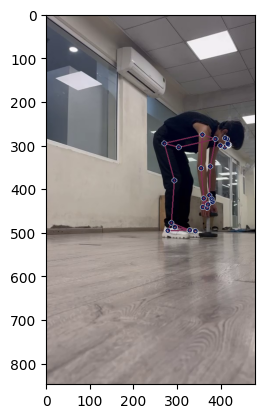

In [182]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [183]:
# There is a possibility that no keypoint landmarks are detected when either hands, pose (essentially a person) are not in view, which is why we push an empty array of value 0 to replace those keypoint landmarks.
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) # 33 landmarks in pose with 4 keypoints each (total values = 132)
    return np.concatenate([pose]) # Total values = 132

In [184]:
result_test = extract_keypoints(results)

In [185]:
result_test

array([ 0.8511759 ,  0.36024827, -0.37562016,  0.99259561,  0.86994779,
        0.35534599, -0.36467412,  0.99430972,  0.87058109,  0.35443756,
       -0.36499217,  0.99303514,  0.87106109,  0.35321081, -0.36527422,
        0.99602455,  0.86783016,  0.35431474, -0.41952929,  0.99485636,
        0.86690074,  0.3527081 , -0.41958898,  0.99237251,  0.86578333,
        0.35079274, -0.41958609,  0.99394298,  0.860461  ,  0.3375254 ,
       -0.26416767,  0.98893261,  0.85365903,  0.33539721, -0.51688087,
        0.97540081,  0.83222854,  0.35679299, -0.32824409,  0.99682778,
        0.82989025,  0.35509411, -0.40204483,  0.9969433 ,  0.80758435,
        0.33777821, -0.12384853,  0.99960172,  0.74474937,  0.32558244,
       -0.54127496,  0.99880213,  0.78233021,  0.41202036, -0.0543294 ,
        0.86018896,  0.73761642,  0.41734475, -0.61395198,  0.98526788,
        0.77723575,  0.48953062, -0.16677238,  0.93326372,  0.75110871,
        0.49830526, -0.64769083,  0.98388869,  0.78819078,  0.50

In [131]:
np.save('0', result_test)

In [132]:
np.load('0.npy')

array([ 0.53408402,  0.15345502, -0.24725297,  0.99976248,  0.53657323,
        0.13674641, -0.22958709,  0.99958247,  0.53743207,  0.13662256,
       -0.22960408,  0.99939865,  0.53822529,  0.13667019, -0.2296083 ,
        0.99931121,  0.5314219 ,  0.13381769, -0.25646245,  0.99975884,
        0.52861136,  0.1316745 , -0.25653198,  0.99975145,  0.52547342,
        0.12954961, -0.25661737,  0.9997806 ,  0.52944362,  0.13465573,
       -0.11433165,  0.99739492,  0.5132342 ,  0.1270794 , -0.23370413,
        0.99967605,  0.53022021,  0.16846637, -0.19833207,  0.99879622,
        0.5247736 ,  0.16551022, -0.23302762,  0.99949938,  0.49602181,
        0.19059618,  0.06086796,  0.99841064,  0.49218062,  0.18721838,
       -0.27278823,  0.99997199,  0.48173434,  0.31972882,  0.11409958,
        0.03625402,  0.48732084,  0.33741945, -0.28122705,  0.98950833,
        0.49432331,  0.42883691,  0.04600396,  0.1251758 ,  0.49564531,
        0.47561678, -0.24992333,  0.95492172,  0.49686918,  0.46

# 4. Setup folders for collection

In [133]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['goodPose', 'badPose'])

# Thirty one videos worth of data
no_sequences = 31

# Videos are going to be 30 frames in length (31*30 = 930 frames)
# 132 keypoint detections in each frame which gives us 122,760 values of keypoints in total
sequence_length = 30

# Folder start
start_folder = 30

In [16]:
for action in actions: 
    for sequence in range(1, no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint values for Training and Testing

In [17]:
fileNameGood = 'good_'
action = 'goodPose'

# For action - Good Postures
# Loop through videos
for sequence in range(1,no_sequences+1):
    fileName = fileNameGood+str(sequence)+'.mp4'
    cap = cv2.VideoCapture(fileName)

    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)
                
            # NEW Apply wait logic
            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION FOR GOOD POSTURES', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for Good Postures Video Number {}'.format(sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.waitKey(2000)
            else: 
                cv2.putText(image, 'Collecting frames for Good Postures Video Number {}'.format(sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
            # Show to screen
            cv2.imshow('Real Time Posture Correction System (RTPCS) - Good Postures', image)
                
            # NEW Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                
        cap.release()
        cv2.destroyAllWindows()


In [18]:
fileNameBad = 'bad_'
action = 'badPose'

# For action - Bad Postures
# Loop through videos
for sequence in range(1,no_sequences+1):
    fileName = fileNameBad+str(sequence)+'.mp4'
    cap = cv2.VideoCapture(fileName)

    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)
                
            # NEW Apply wait logic
            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION FOR BAD POSTURES', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for Bad Postures Video Number {}'.format(sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                cv2.waitKey(2000)
            else: 
                cv2.putText(image, 'Collecting frames for Bad Postures Video Number {}'.format(sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
            # Show to screen
            cv2.imshow('Real Time Posture Correction System (RTPCS) - Bad Postures', image)
                
            # NEW Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                
        cap.release()
        cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [134]:
from sklearn.model_selection import train_test_split # Allows us to create a training and testing partition
from tensorflow.python.keras.utils.np_utils import to_categorical 

In [135]:
label_map = {label:num for num, label in enumerate(actions)} # Array to represent each one of our different actions

In [136]:
label_map

{'goodPose': 0, 'badPose': 1}

In [137]:
# sequence = x data
# labels = y data
sequences, labels = [], []

# Loop through each action
for action in actions:
    
    # Loop through each video/sequence
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []

        # Loop through each frame
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Append all frames i.e. 1 sequence in window
            window.append(res)

        # Appends all windows i.e. all sequences
        sequences.append(window)
        
        labels.append(label_map[action])

In [186]:
# 62 videos/sequences in total with 30 frames in each sequence and 132 keypoint values in each frame
np.array(sequences).shape

(62, 30, 132)

In [187]:
np.array(labels).shape

(62,)

In [140]:
X = np.array(sequences)

In [188]:
X.shape

(62, 30, 132)

In [189]:
y = to_categorical(labels).astype(int)

In [143]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # Train and test split

In [190]:
X_test.shape

(16, 30, 132)

# 7. Build and Train LSTM Neural Network

In [146]:
import tensorflow as tf # Importing tensorflow to build and train our model
from keras.models import Sequential # Allows us to build a sequential neural network
from keras.layers import LSTM # LSTM layer
from keras.layers import Dense # Dense Layer
from keras.callbacks import TensorBoard # Allows us to trace and monitor our model's training and accuracy
from keras.callbacks import Callback

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import MaxPooling3D, ConvLSTM2D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [147]:
log_dir = os.path.join(os.getcwd(),'Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [148]:
log_dir

'C:\\Users\\Ereena\\Documents\\Research Project - Pose Estimation\\Logs'

In [149]:
# Instantiating a sequential model
model = Sequential()

# 3 LSTM layers in total with 1st LSTM layer with 64 units and input shape with 200 frames and  keypoint values
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,132)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# 3 Fully connected Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

# Less Data Required for such model, faster to train, and faster detections in real-time

In [150]:
# Compiling model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [151]:
class MyThresholdCallback(Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["categorical_accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True
callback=MyThresholdCallback(threshold=0.95)

In [152]:
model.fit(X_train, y_train, epochs=150, callbacks=[callback])

Epoch 1/150
2/2 [==============================] - 6s 57ms/step - loss: 0.6974 - categorical_accuracy: 0.4348
Epoch 2/150
2/2 [==============================] - 0s 30ms/step - loss: 0.6834 - categorical_accuracy: 0.5435
Epoch 3/150
2/2 [==============================] - 0s 32ms/step - loss: 0.6490 - categorical_accuracy: 0.6522
Epoch 4/150
2/2 [==============================] - 0s 29ms/step - loss: 0.5696 - categorical_accuracy: 0.8696
Epoch 5/150
2/2 [==============================] - 0s 29ms/step - loss: 0.5133 - categorical_accuracy: 0.7609
Epoch 6/150
2/2 [==============================] - 0s 28ms/step - loss: 0.6957 - categorical_accuracy: 0.7609
Epoch 7/150
2/2 [==============================] - 0s 27ms/step - loss: 0.2805 - categorical_accuracy: 0.9130
Epoch 8/150
2/2 [==============================] - 0s 28ms/step - loss: 0.4158 - categorical_accuracy: 0.8261
Epoch 9/150
2/2 [==============================] - 0s 29ms/step - loss: 0.4226 - categorical_accuracy: 0.8478
Epoch 10/1

In [153]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 64)            50432     
                                                                 
 lstm_19 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 2)                 66        
                                                                 
Total params: 204962 (800.63 KB)
Trainable params: 20

In [114]:
del model

# 8. Make Predictions

In [154]:
res = model.predict(X_test)

1/1 [==============================] - 1s 535ms/step


In [194]:
actions[np.argmax(res[0])]

'goodPose'

In [195]:
actions[np.argmax(y_test[0])]

'badPose'

# 9. Save Weights

In [157]:
model.save('action.h5')

C:\Users\Ereena\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [158]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [159]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [160]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [161]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [162]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 1],
        [0, 8]],

       [[8, 0],
        [1, 7]]], dtype=int64)

In [163]:
accuracy_score(ytrue, yhat)

0.9375

Epoch 1/150
2/2 [==============================] - 4s 3s/step - loss: 0.0625 - categorical_accuracy: 1.0000 - val_loss: 0.0069 - val_categorical_accuracy: 1.0000
Epoch 2/150
2/2 [==============================] - 0s 193ms/step - loss: 0.1309 - categorical_accuracy: 0.9722 - val_loss: 0.1825 - val_categorical_accuracy: 0.8000
Epoch 3/150
2/2 [==============================] - 0s 148ms/step - loss: 0.6147 - categorical_accuracy: 0.8333 - val_loss: 0.1442 - val_categorical_accuracy: 1.0000
Epoch 4/150
2/2 [==============================] - 0s 158ms/step - loss: 0.1850 - categorical_accuracy: 0.9167 - val_loss: 0.1303 - val_categorical_accuracy: 1.0000
Epoch 5/150
2/2 [==============================] - 0s 110ms/step - loss: 0.1325 - categorical_accuracy: 1.0000 - val_loss: 0.1506 - val_categorical_accuracy: 1.0000
Epoch 6/150
2/2 [==============================] - 0s 106ms/step - loss: 0.1777 - categorical_accuracy: 1.0000 - val_loss: 0.1587 - val_categorical_accuracy: 1.0000
Epoch 7/150
2

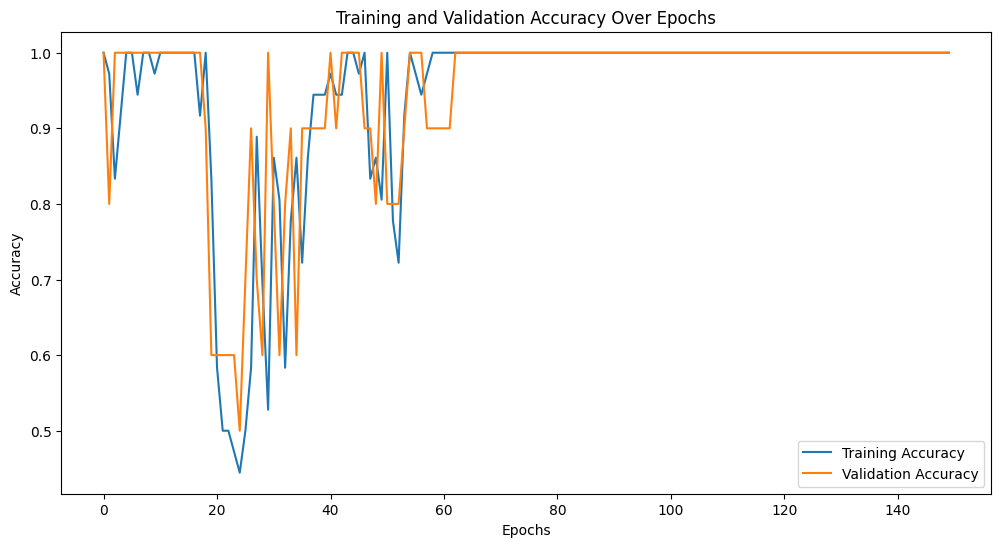

In [203]:
## Training and Validation Accuracy Over Epochs:

## This plot shows how the accuracy of the model improves over the training period.

history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 292ms/step


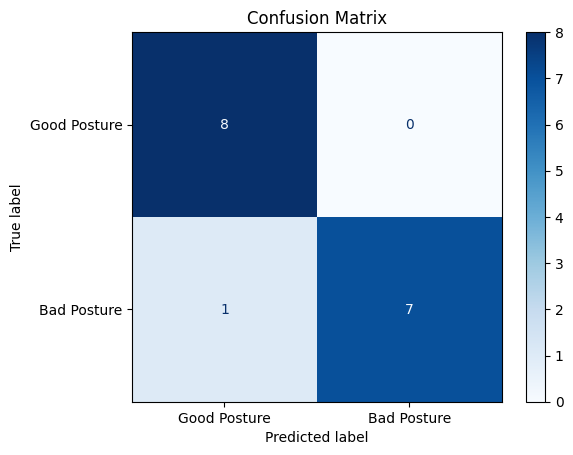

In [204]:
## Confusion Matrix:

## Description: The confusion matrix provides a detailed breakdown of the true positives, true negatives, false positives, and false negatives.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good Posture', 'Bad Posture'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

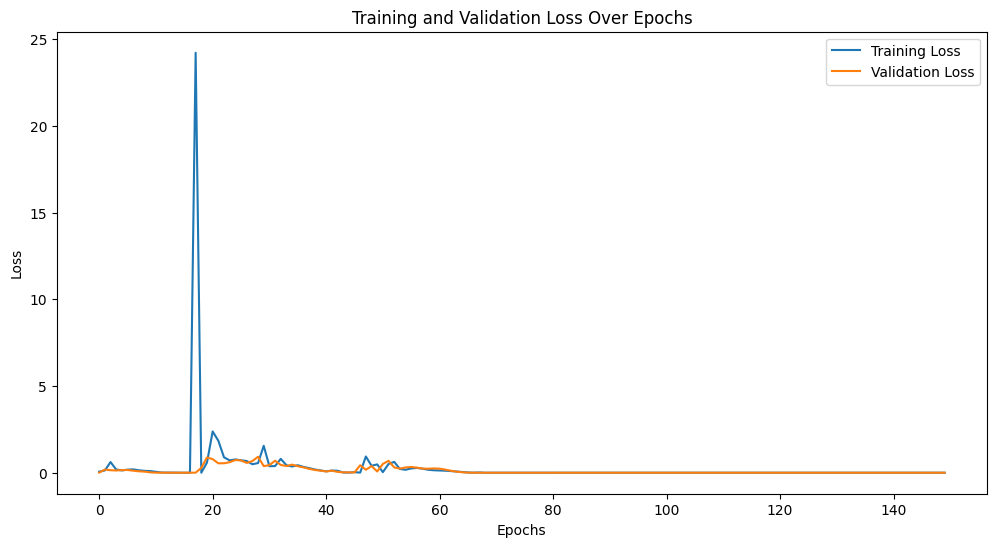

In [205]:
## Loss Over Epochs:

## Description: This plot shows how the loss decreases as the model trains over epochs, indicating the model's learning progress.

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

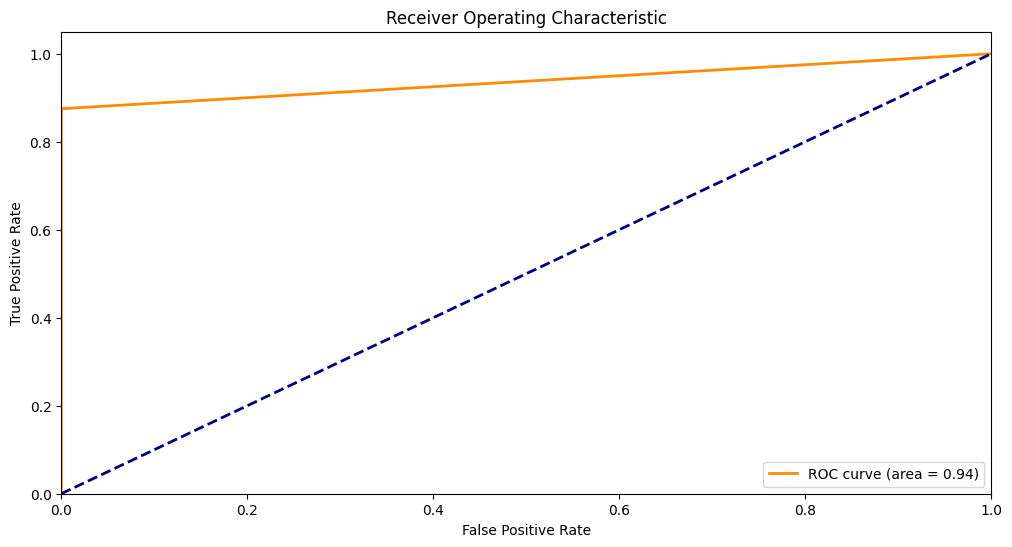

In [206]:
## ROC Curve:

## Description: The ROC curve shows the trade-off between sensitivity and specificity for the classification model.

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred_classes)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# 11. Test in Real Time

In [164]:
from scipy import stats

In [165]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [208]:
# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        # Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Real Time Posture Correction System (RTPCS)', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

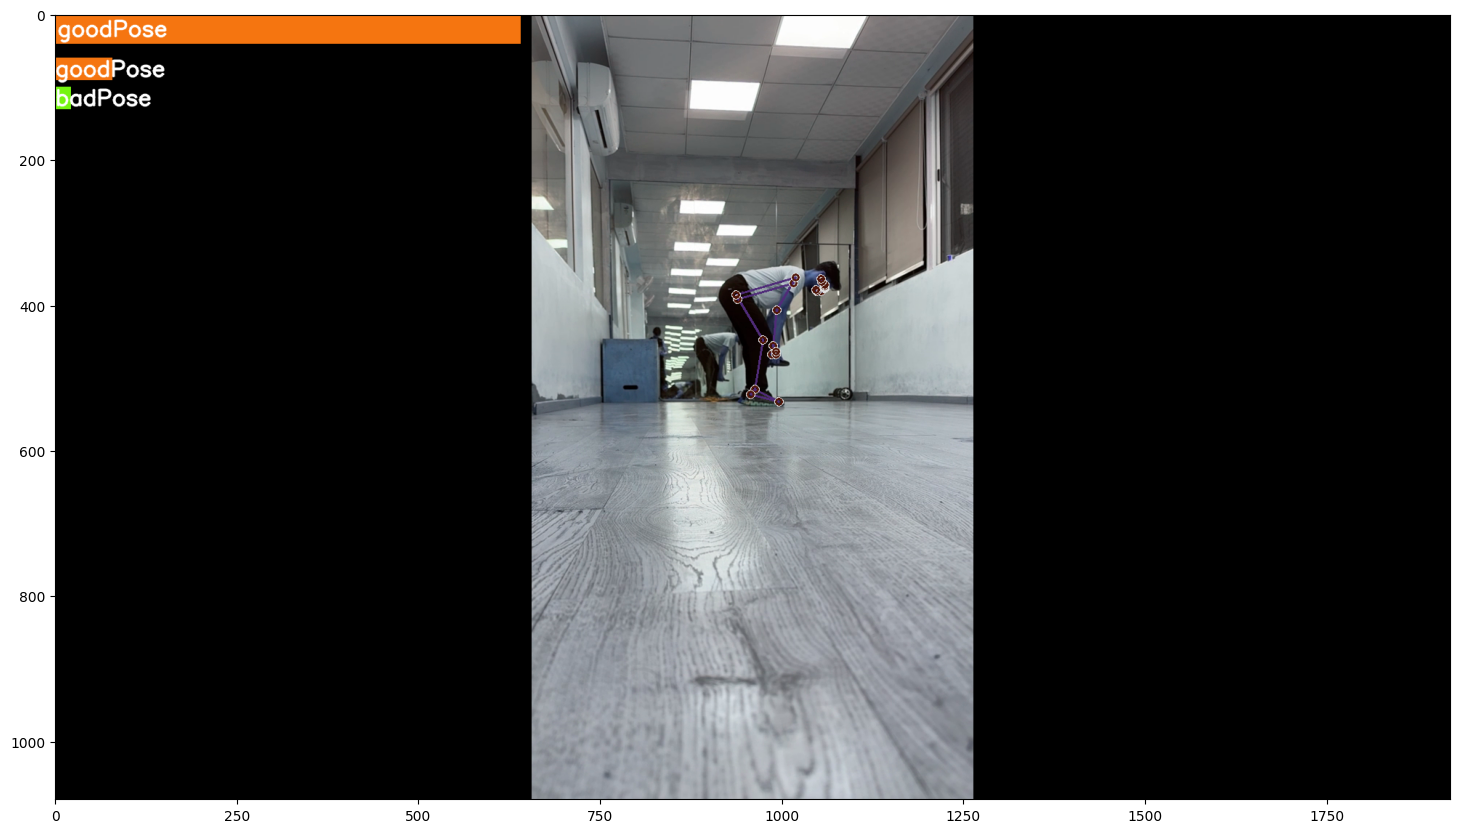

In [200]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))